# Lightkurve for C16

The plan is to use lightkurve for C16 TPF produced by John (using kadenza?). A "patch" needs to be added to lightkurve for it to work, so a fork is made.

Forked lightkurve: [github](https://github.com/jpdeleon/lightkurve)

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
from astropy.io import fits
import pandas as pd

Official TPF

In [3]:
#First we open a Target Pixel File from MAST
tpf_official = 'mastDownload/Kepler/kplr006922244_lc_Q111111111111111111/kplr006922244-2010078095331_lpd-targ.fits.gz'

fits.open(tpf_official).info()

Filename: mastDownload/Kepler/kplr006922244_lc_Q111111111111111111/kplr006922244-2010078095331_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   4397R x 13C   [D, E, J, 25J, 25E, 25E, 25E, 25E, 25E, J, E, E, 25E]   
  2  APERTURE      1 ImageHDU        48   (5, 5)   int32   


Unofficial TPF

In [4]:
tpf_unofficial = 'ktwo249622103-unofficial-tpf.fits'

fits.open(tpf_unofficial).info()

Filename: ktwo249622103-unofficial-tpf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   4305R x 12C   [D, E, J, 88J, 88E, 88E, 88E, 88E, 88E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 8)   int32   


Official TPF

In [5]:
official_rec = fits.open(tpf_official)[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '25J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(5,5)'
    name = 'FLUX'; format = '25E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(5,5)'
    name = 'FLUX_ERR'; format = '25E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(5,5)'
    name = 'FLUX_BKG'; format = '25E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(5,5)'
    name = 'FLUX_BKG_ERR'; format = '25E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(5,5)'
    name = 'COSMIC_RAYS'; format = '25E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(5,5)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'RB_LEVEL'; format = '25E'; unit = 'sigma'; disp = 'E14.7'; dim = '(5,5)'
)

In [ ]:
for key in official_rec:
    print(len(official_rec[key]))

In [6]:
fits.open(tpf_unofficial)[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'D'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '88J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,8)'
    name = 'FLUX'; format = '88E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,8)'
    name = 'FLUX_ERR'; format = '88E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,8)'
    name = 'FLUX_BKG'; format = '88E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,8)'
    name = 'FLUX_BKG_ERR'; format = '88E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,8)'
    name = 'COSMIC_RAYS'; format = '88E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,8)'
    name = 'QUALITY'; format = 'J'; disp = 'B24.24'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixels'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixels'; disp = 'E14.7'
)

Official TPF

In [7]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(tpf_official, quality_bitmask='hardest')
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers(sigma=10)
window_length = 101
lc = lc.flatten(window_length=window_length, polyorder=2, break_tolerance=10*window_length)
corr_lc = lc.correct(windows=20)

100%|██████████| 20/20 [00:01<00:00, 11.37it/s]


Unofficial TPF

In [8]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(tpf_unofficial, quality_bitmask='hardest')
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers(sigma=10)
window_length = 101
lc = lc.flatten(window_length=window_length, polyorder=2, break_tolerance=10*window_length)

In [14]:
from lightkurve import SFFCorrector

sff = SFFCorrector()

time, flux, centroid_col, centroid_row = lc.time, lc.flux, lc.centroid_col, lc.centroid_row
sff.correct(time, flux, centroid_col, centroid_row)

100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


In [11]:
tpf = KeplerTargetPixelFile(tpf_unofficial) #, quality_bitmask='hardest')
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers()
lc = lc.flatten(window_length=401, break_tolerance=100)
corr_lc = lc.correct(windows=20)

100%|██████████| 20/20 [00:01<00:00, 10.47it/s]


In [12]:
tpf.shape

(4305, 8, 11)

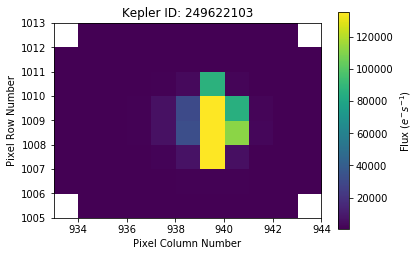

In [13]:
tpf.plot(frame=1)

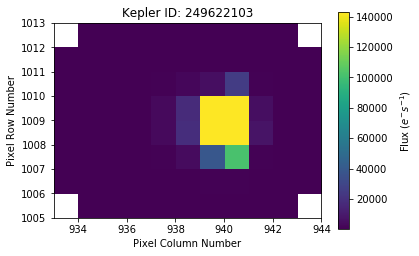

In [14]:
#pl.imshow(tpf.pipeline_mask,origin='bottom')
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [15]:
lc.properties()

   Attribute                    Description                 
--------------- --------------------------------------------
        channel                                           63
       campaign                                         None
        mission                                           K2
      cadenceno                                array (4305,)
   centroid_col                                array (4265,)
   centroid_row                                array (4265,)
           flux                                array (4265,)
       flux_err                                array (4265,)
        quality                                array (4265,)
           time                                array (4265,)
      corrector <class 'lightkurve.correctors.SFFCorrector'>
       keplerid                           <class 'NoneType'>
           meta                               <class 'dict'>
quality_bitmask                           <class 'NoneType'>
        quarter         

In [16]:
lc.cdpp()

4379.940857076528

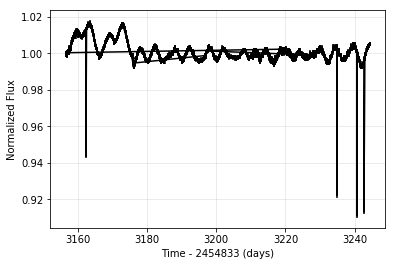

In [17]:
lc.plot(linestyle='solid');

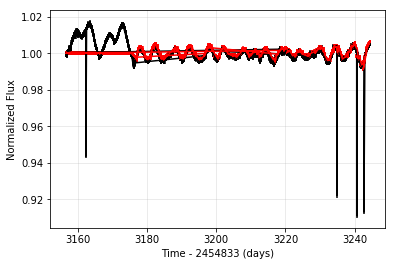

In [18]:
flat, trend = lc.flatten(window_length=401, return_trend=True)

ax = lc.plot(linestyle='solid');
trend.plot(ax, color='red');

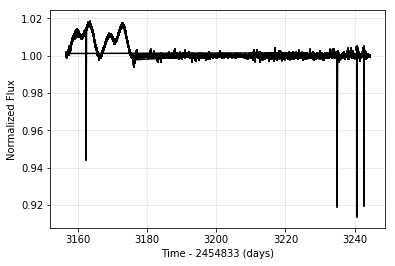

In [19]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

In [20]:
from gatspy.periodic import LombScargleFast

model=LombScargleFast(fit_period=True)

model.optimizer.period_range = (1, 10)

model.fit(flat_lc.time, flat_lc.flux, flat_lc.flux_err)

Finding optimal frequency:
 - Estimated peak width = 0.0714
 - Using 5 steps per peak; omega_step = 0.0143
 - User-specified period range:  1 to 10
 - Computing periods at 397 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


In [21]:
model.best_period

9.630115700317473

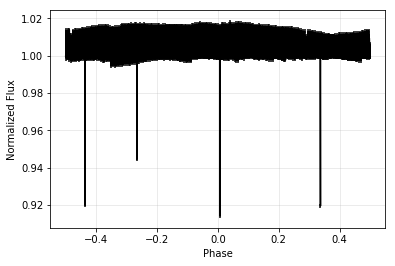

In [22]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

# Using C13 Example 

In [14]:
from astropy.io import fits

dirloc = '/home/jp/data/transit/c13/'
fname = dirloc+'ktwo247589423-c13_lpd-targ.fits.gz'
sample_fits = fits.open(fname)

# SFF

In [11]:
from lightkurve import KeplerTargetPixelFile
import numpy as np
import pandas as pd

tpf_unofficial = 'ktwo249622103-unofficial-tpf.fits'

tpf = KeplerTargetPixelFile(tpf_unofficial, quality_bitmask='hardest')
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers(sigma=10)

In [12]:
#df contains
#BJD - 2454833	Raw Flux	Corrected Flux	X-centroid	Y-centroid	arclength	Correction	Thrusters On

time = lc.time
flux = lc.flux

col = lc.centroid_col
col = col - np.mean(col)
row = lc.centroid_row
row = row - np.mean(row)

#pd.DataFrame(np.c_[])

In [13]:
def _get_eigen_vectors(centroid_col, centroid_row):
    '''get the eigenvalues and eigenvectors given centroid x, y positions'''
    centroids = np.array([centroid_col, centroid_row])
    eig_val, eig_vec = np.linalg.eigh(np.cov(centroids))
    return eig_val, eig_vec

def _rotate(eig_vec, centroid_col, centroid_row):
    '''rotate the centroids into their predominant linear axis'''
    centroids = np.array([centroid_col, centroid_row])
    return np.dot(eig_vec, centroids)

eig_val, eig_vec = _get_eigen_vectors(col, row)
v1, v2 = eig_vec

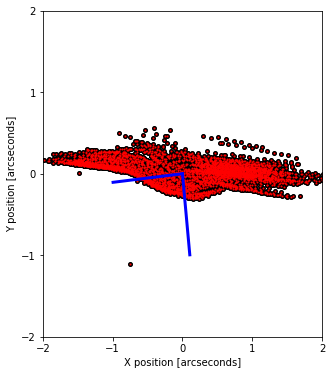

In [15]:
platescale = 4.0 # The Kepler plate scale; has units of arcseconds / pixel

pl.figure(figsize=(5, 6))
pl.plot(col * platescale, row * platescale, 'ko', ms=4)
pl.plot(col * platescale, row * platescale, 'ro', ms=1)
pl.xticks([-2, -1,0, 1, 2])
pl.yticks([-2, -1,0, 1, 2])
pl.xlabel('X position [arcseconds]')
pl.ylabel('Y position [arcseconds]')
pl.xlim(-2, 2)
pl.ylim(-2, 2)
pl.plot([0, v1[0]], [0, v1[1]], color='blue', lw=3)
pl.plot([0, v2[0]], [0, v2[1]], color='blue', lw=3);

In [16]:
rot_colp, rot_rowp = _rotate(eig_vec, col, row) #units in pixels

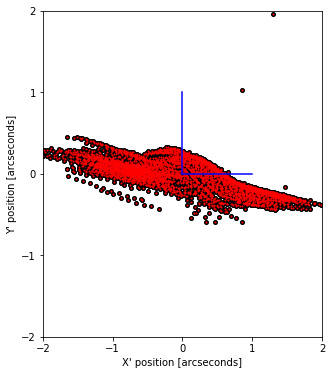

In [17]:
pl.figure(figsize=(5, 6))
pl.plot(rot_rowp * platescale, rot_colp * platescale, 'ko', ms=4)
pl.plot(rot_rowp * platescale, rot_colp * platescale, 'ro', ms=1)
pl.xticks([-2, -1,0, 1, 2])
pl.yticks([-2, -1,0, 1, 2])
pl.xlabel("X' position [arcseconds]")
pl.ylabel("Y' position [arcseconds]")
pl.xlim(-2, 2)
pl.ylim(-2, 2)
pl.plot([0, 1], [0, 0], color='blue')
pl.plot([0, 0], [0, 1], color='blue');

In [ ]:
## Calculate arclength
z = np.polyfit(rot_rowp, rot_colp, 5)
p5 = np.poly1d(z)
p5_deriv = p5.deriv()

x0_prime = np.min(rot_rowp)
xmax_prime = np.max(rot_rowp)
x_dense = np.linspace(x0_prime, xmax_prime, 2000)

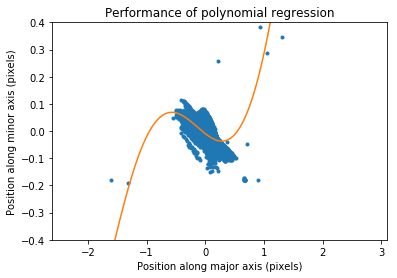

In [20]:
pl.plot(rot_rowp, rot_colp, '.')
pl.plot(x_dense, p5(x_dense))
pl.ylabel('Position along minor axis (pixels)')
pl.xlabel('Position along major axis (pixels)')
pl.title('Performance of polynomial regression')
pl.ylim(-0.4, 0.4);

In [21]:
@np.vectorize
def arclength(x):
    '''Input x1_prime, get out arclength'''
    gi = x_dense <x
    s_integrand = np.sqrt(1 + p5_deriv(x_dense[gi]) ** 2)
    s = np.trapz(s_integrand, x=x_dense[gi])
    return s

al = arclength(rot_rowp)*4.0

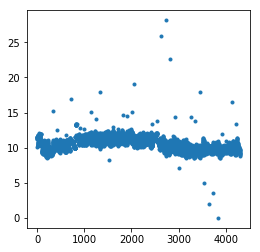

In [25]:
aspect_ratio = pl.figaspect(1)
pl.figure(figsize=aspect_ratio)
pl.plot(arclength(rot_rowp)*4.0, '.')

In [33]:
#apply high-pass filter using BSplines with N-day breakpoints
from scipy.interpolate import BSpline
from scipy import interpolate

N = 1.5
interior_knots = np.arange(time[0]+N, time[0]+6, N)

In [34]:
interior_knots

array([3177.27310826, 3178.77310826, 3180.27310826])

In [23]:
t,c,k = interpolate.splrep(sorted(time), flux, s=0, task=-1, t=interior_knots)
bspl = BSpline(t,c,k)

NameError: name 'interpolate' is not defined

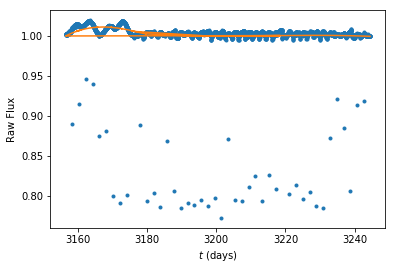

In [41]:
pl.plot(time, flux, '.')
pl.plot(time, bspl(time))
pl.xlabel('$t$ (days)')
pl.ylabel('Raw Flux');

In [43]:
flux = flux/bspl(time)